# Data

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

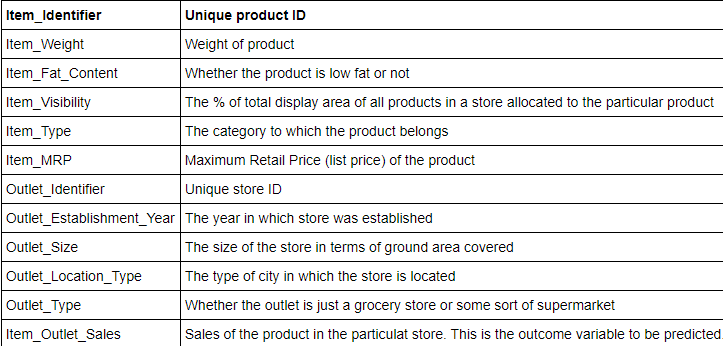

In [30]:
from IPython.display import Image
Image("C:\\Users\\DELL\\Pictures\\Screenshots\\s1.png")

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Concatenating Datasets

In [32]:
import os
os.getcwd()

'C:\\Users\\DELL\\Downloads'

In [33]:
train = pd.read_csv("datamart_train.csv")
test = pd.read_csv("datamart_test.csv")

train['source']='train'
test['source']='test'
df = pd.concat([train, test],ignore_index=True)

In [34]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


Item Identifier need to be mapped

# EDA

In [35]:
#Mapping variable Item_Identifier
df['Item_Identifier'].value_counts()
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [36]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_Type_Combined'],
      dtype='object')

In [37]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Type_Combined              0
dtype: int64

As the data is missing we have to fill the data by either mean for median.

In [38]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Now, we will be filling the missing data.

In [39]:
#We will be filling the continuous data with the help to taking mean of these variables.
df.Item_Outlet_Sales = df.Item_Outlet_Sales.fillna(df.Item_Outlet_Sales.mean())
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())

In [40]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

As the data is categorical we will fill it Medium Outlet_Size as it is most common. 

In [41]:
df.Outlet_Size = df.Outlet_Size.fillna("Medium")

In [42]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
Item_Type_Combined           0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
 13  Item_Type_Combined         14204 non-null  obj

In [44]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [45]:
df.Item_Fat_Content=df.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

As some of the variables are categorical, we need to perform encoding on it.

# Encoding

In [46]:
df.Item_Identifier.value_counts()
df.Item_Fat_Content.value_counts()
df.Item_Type.value_counts()
df.Outlet_Identifier.value_counts()
df.Outlet_Size.value_counts()
df.Outlet_Location_Type.value_counts()
df.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [47]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [48]:
#One Hot Coding:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,1,...,0,1,0,0,0,0,0,0,0,0


In [50]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [51]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# Building the model

In [52]:
# Reading data
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

Splitting the data

In [53]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [54]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [55]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Testing The Model

As the target variable is numerical. Therefore we  will be using Regression Techniques.

In [57]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,r2_score

The data is already splitted. Therefore, we will proceed with testing models.

Linear Regression

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1847.15910268, 1573.52276942, 1874.13419298, ..., 1808.73681713,
       3561.5386965 , 1263.79841883])

In [60]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
print("Accuracy : ",lr_accuracy)

Accuracy :  56.35


In [61]:
print("r2_score :",r2_score(y_train, regressor.predict(X_train)))

r2_score : 0.5635180059745906


Decision Tree Model

In [62]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1892.06614452,
       3805.94860417, 1349.51290433])

In [63]:
tree_accuracy = round(regressor.score(X_train,y_train) * 100,2)
print("Accuracy : ",tree_accuracy)

Accuracy :  58.84


In [64]:
print("r2_score :",r2_score(y_train, regressor.predict(X_train)))

r2_score : 0.5884050821570486


Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([1654.12833208, 1367.13603762,  593.01673651, ..., 1951.12706366,
       3714.41475958, 1294.89335288])

In [66]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
print("Accuracy : ",rf_accuracy)

Accuracy :  0.61


In [67]:
print("r2_score :",r2_score(y_train, regressor.predict(X_train)))

r2_score : 0.6125278962633556


AdaBoostRegressor

In [68]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(n_estimators=100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([2029.87372847, 1596.01157788, 2022.6750996 , ..., 2058.65583637,
       3981.60770316, 1171.93809118])

In [69]:
ada_accuracy = round(regressor.score(X_train,y_train),2)
print("Accuracy : ",ada_accuracy)

Accuracy :  0.5


In [70]:
print("r2_score :",r2_score(y_train, regressor.predict(X_train)))

r2_score : 0.5010797813836282


From we can see that Random Forest Regressor is the best technique with an accuracy of 61%. 

We  will use hyper-parameter tuning to increase its accuracy further.

# Hyper-Parameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
parameters ={'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring='r2')
GCV.fit(X_train,y_train)
GCV.best_estimator_
GCV.pred=GCV.best_estimator_.predict(X_test)
print("Final accuracy :",r2_score(y_pred,GCV.pred)*100)

Final accuracy : 77.39067840816625


By the help of Hyper-Parameter tuning we have increased the accuracy of our model to 78%. 